# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
import os
import json
from datetime import date

# Add config module to sys path
sys.path.insert(0, os.path.abspath('../config'))

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Today's date
date_today = date.today()

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | tidjikja
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | emerald
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | vostochnyy
Processing Record 13 of Set 1 | aromashevo
Processing Record 14 of Set 1 | buckeye
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | tobruk
Processing Record 19 of Set 1 | wuwei
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | placido de castro
Processing Record 22 of S

Processing Record 40 of Set 4 | glace bay
Processing Record 41 of Set 4 | ust'-kulom
Processing Record 42 of Set 4 | balaklava
Processing Record 43 of Set 4 | wailua homesteads
Processing Record 44 of Set 4 | chui
Processing Record 45 of Set 4 | howrah
Processing Record 46 of Set 4 | shaowu
Processing Record 47 of Set 4 | buala
Processing Record 48 of Set 4 | la passe
Processing Record 49 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 5 | kapuskasing
Processing Record 1 of Set 5 | vadso
Processing Record 2 of Set 5 | armacao de buzios
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | juegang
Processing Record 5 of Set 5 | omu-aran
Processing Record 6 of Set 5 | minas de marcona
Processing Record 7 of Set 5 | mariental
Processing Record 8 of Set 5 | mont-dore
Processing Record 9 of Set 5 | mount darwin
Processing Record 10 of Set 5 | tionk essil
Processing Record 11 of Set 5 | cabo san lucas
Processing Record 12 of Set 5 | thomps

Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | oyem
Processing Record 33 of Set 8 | marhaura
Processing Record 34 of Set 8 | zhanaozen
Processing Record 35 of Set 8 | santa vitoria do palmar
Processing Record 36 of Set 8 | leava
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | agenebode
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | tsiombe
Processing Record 41 of Set 8 | taguatinga
Processing Record 42 of Set 8 | olyokminsk
Processing Record 43 of Set 8 | guozhen
Processing Record 44 of Set 8 | kijang
Processing Record 45 of Set 8 | cowansville
Processing Record 46 of Set 8 | balaipungut
Processing Record 47 of Set 8 | kapoeta
Processing Record 48 of Set 8 | smithers
Processing Record 49 of Set 8 | kolonia
Processing Record 0 of Set 9 | cargados carajos
City not found. Skipping...
Processing Record 1 of Set 9 | rabaul
Processing Record 2 of Set 9 | laguna
Processing Record 3 of Set 9 | uturoa
Processing Rec

Processing Record 17 of Set 12 | saldanha
Processing Record 18 of Set 12 | madang
Processing Record 19 of Set 12 | loudi
Processing Record 20 of Set 12 | palembang
Processing Record 21 of Set 12 | iquique
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | poggiardo
Processing Record 25 of Set 12 | terrace
Processing Record 26 of Set 12 | new norfolk
Processing Record 27 of Set 12 | bonnyville
Processing Record 28 of Set 12 | demopolis
Processing Record 29 of Set 12 | pudozh
Processing Record 30 of Set 12 | aioun
Processing Record 31 of Set 12 | jua dos vieiras
City not found. Skipping...
Processing Record 32 of Set 12 | maragogi
Processing Record 33 of Set 12 | oeiras
Processing Record 34 of Set 12 | portales
Processing Record 35 of Set 12 | malpica
Processing Record 36 of Set 12 | kharp
Processing Record 37 of Set 12 | nasiriyah
Processing Record 38 of Set 12 | la jolla
Processing Record 39 of Set 12 | isla mujeres


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,-4.99,74,100,4.12,GL,1702176286
1,isafjordur,66.0755,-23.1240,-2.67,87,77,2.33,IS,1702176286
2,tidjikja,18.5564,-11.4271,19.86,24,65,5.70,MR,1702176286
3,katsuura,35.1333,140.3000,17.24,43,0,1.01,JP,1702176286
4,port alfred,-33.5906,26.8910,13.99,94,97,0.45,ZA,1702176286


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-4.99,74,100,4.12,GL,1702176286
1,isafjordur,66.0755,-23.1240,-2.67,87,77,2.33,IS,1702176286
2,tidjikja,18.5564,-11.4271,19.86,24,65,5.70,MR,1702176286
3,katsuura,35.1333,140.3000,17.24,43,0,1.01,JP,1702176286
4,port alfred,-33.5906,26.8910,13.99,94,97,0.45,ZA,1702176286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

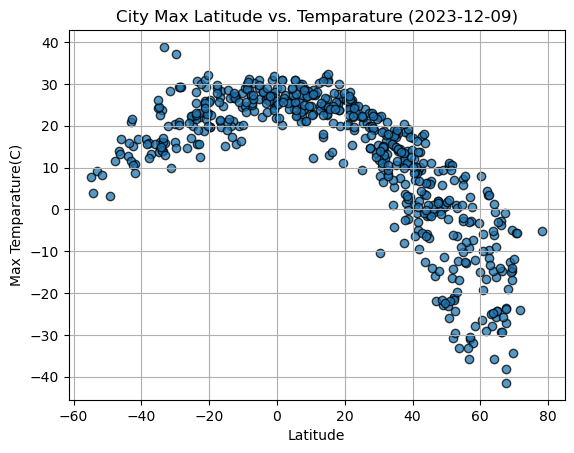

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, alpha=0.75, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temparature ({date_today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temparature(C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

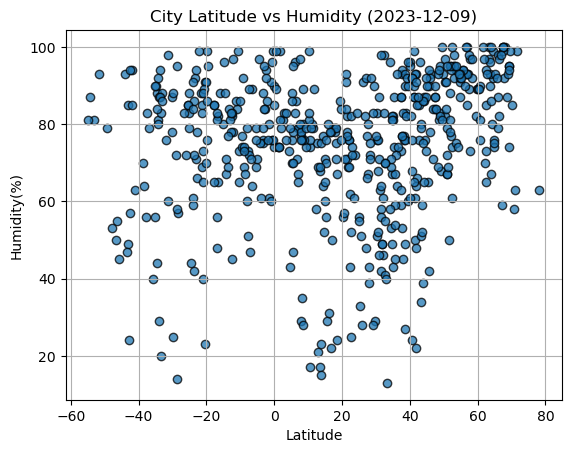

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, alpha=.75, edgecolor='black')


# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({date_today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

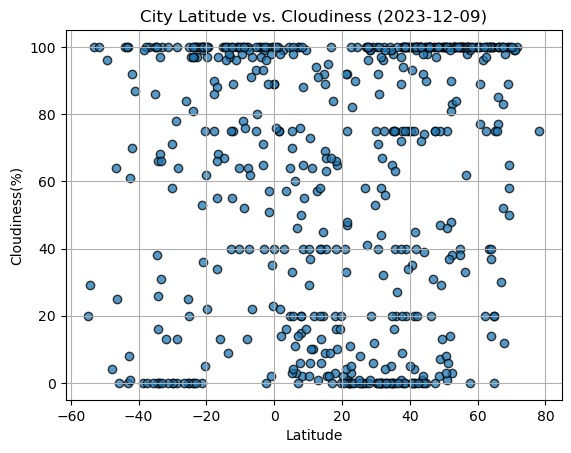

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, alpha=.75, edgecolor='black')


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date_today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

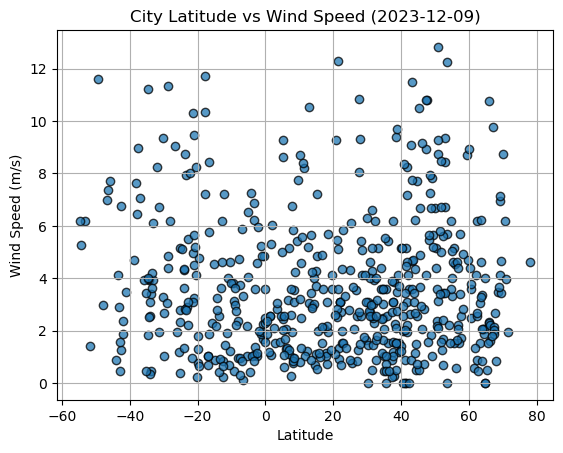

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, alpha=.75, edgecolor='black')


# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({date_today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def createLinregressPlot(x_values, y_values, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

    print(f'The r-value is: {rvalue}')
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r-")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    
    return line_eq
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,-4.99,74,100,4.12,GL,1702176286
1,isafjordur,66.0755,-23.1240,-2.67,87,77,2.33,IS,1702176286
2,tidjikja,18.5564,-11.4271,19.86,24,65,5.70,MR,1702176286
3,katsuura,35.1333,140.3000,17.24,43,0,1.01,JP,1702176286
9,albany,42.6001,-73.9662,9.36,85,100,2.65,US,1702176287


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port alfred,-33.5906,26.8910,13.99,94,97,0.45,ZA,1702176286
5,port mathurin,-19.6833,63.4167,26.21,76,22,4.76,MU,1702176286
6,bredasdorp,-34.5322,20.0403,14.61,88,38,1.84,ZA,1702176287
7,port-aux-francais,-49.3500,70.2167,3.12,79,96,11.59,TF,1702176287
8,emerald,-23.5333,148.1667,30.75,42,0,7.95,AU,1702176287


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8488744576976567


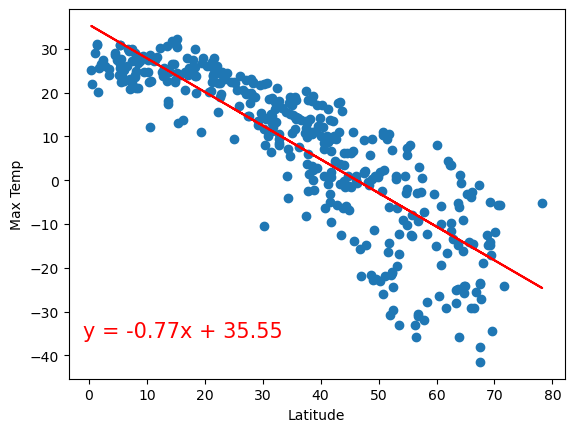

In [15]:
# Linear regression on Northern Hemisphere

line_eq = createLinregressPlot(northern_hemi_df['Lat'], 
                      northern_hemi_df['Max Temp'], 
                      'Latitude', 'Max Temp')

plt.annotate(line_eq, (10, 30), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


The r-value is: 0.682607611858177


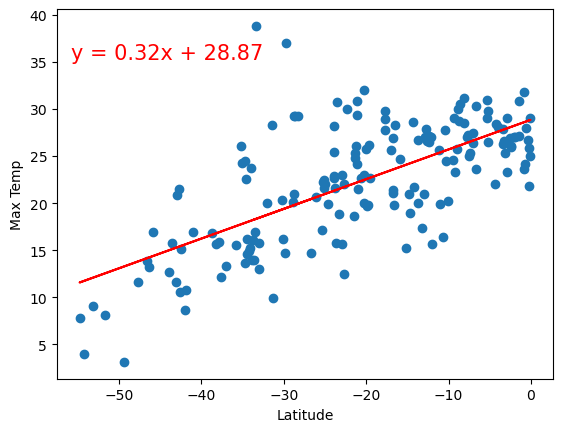

In [16]:
# Linear regression on Southern Hemisphere

line_eq = createLinregressPlot(southern_hemi_df['Lat'], 
                      southern_hemi_df['Max Temp'], 
                      'Latitude', 'Max Temp')

plt.annotate(line_eq, (10, 230), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


**Discussion about the linear relationship:** 

In Northern Hemisphere, the temperature value decrease as the latitude goes up

In Southern Hemisphere, the temperature value increases as the latitude goes up

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3496396403344272


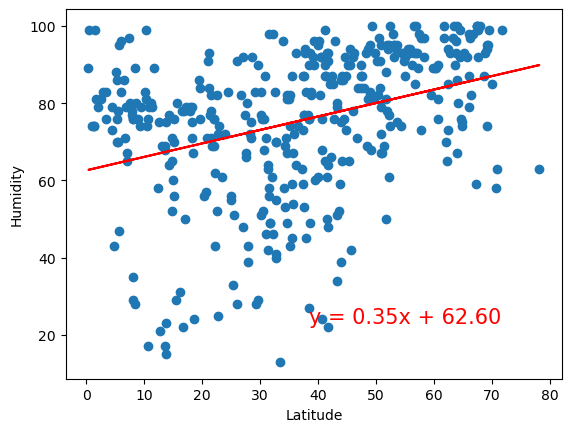

In [17]:
# Northern Hemisphere
line_eq = createLinregressPlot(northern_hemi_df['Lat'], 
                      northern_hemi_df['Humidity'], 
                      'Latitude', 'Humidity')

plt.annotate(line_eq, (175, 40), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


The r-value is: 0.17518971609269288


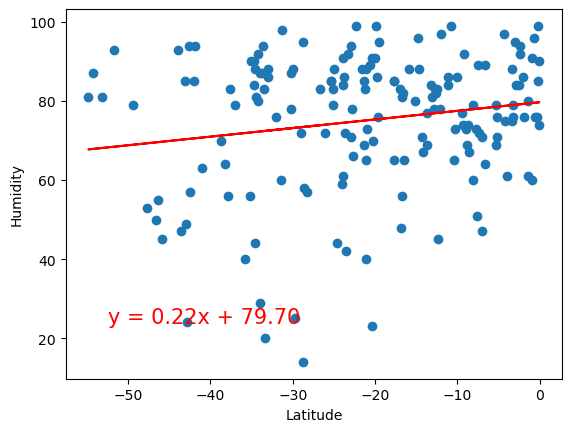

In [18]:
# Southern Hemisphere

line_eq = createLinregressPlot(southern_hemi_df['Lat'], 
                      southern_hemi_df['Humidity'], 
                      'Latitude', 'Humidity')

plt.annotate(line_eq, (30, 40), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


**Discussion about the linear relationship:** 

In both hemispheres, humidity increases as the latitude goes up

In Southern Hemisphere, humidity doesn't increases as much it does in Northern Hemisphere, with the increase in latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.32866068640308255


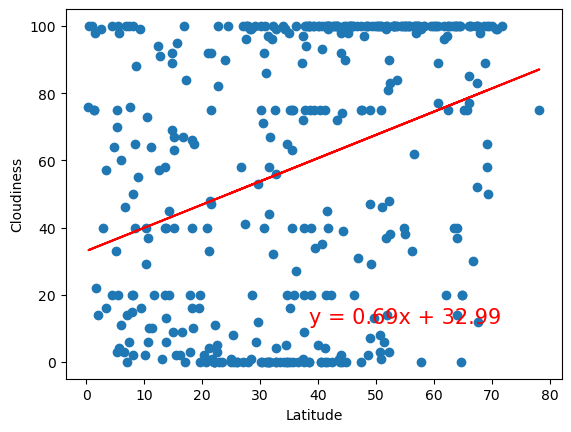

In [19]:
# Northern Hemisphere

line_eq = createLinregressPlot(northern_hemi_df['Lat'], 
                      northern_hemi_df['Cloudiness'], 
                      'Latitude', 'Cloudiness')

plt.annotate(line_eq, (175, 40), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


The r-value is: 0.25182729421302114


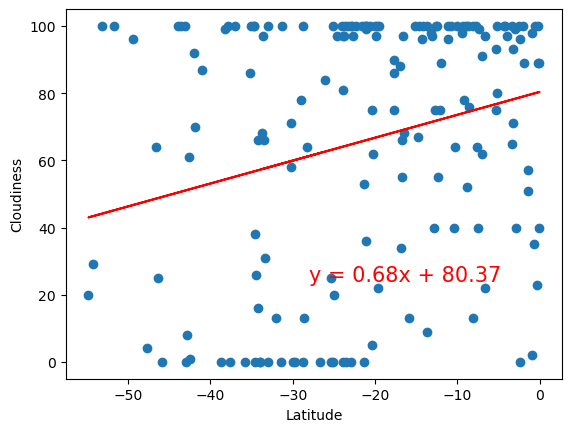

In [20]:
# Southern Hemisphere

line_eq = createLinregressPlot(southern_hemi_df['Lat'], 
                      southern_hemi_df['Cloudiness'], 
                      'Latitude', 'Cloudiness')

plt.annotate(line_eq, (175, 70), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


**Discussion about the linear relationship:** 

In both hemispheres, cloudiness increases as the latitude goes up

In Southern Hemisphere, cloudiness doesn't increases as much it does in Northern Hemisphere with the increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10571630228740037


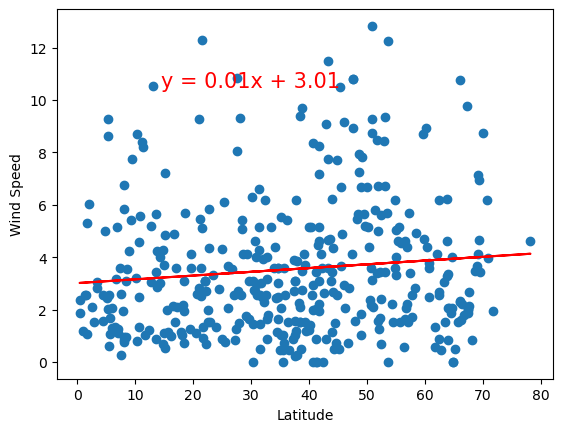

In [21]:
# Northern Hemisphere

line_eq = createLinregressPlot(northern_hemi_df['Lat'], 
                      northern_hemi_df['Wind Speed'], 
                      'Latitude', 'Wind Speed')

plt.annotate(line_eq, (75, 210), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


The r-value is: -0.24313125427248883


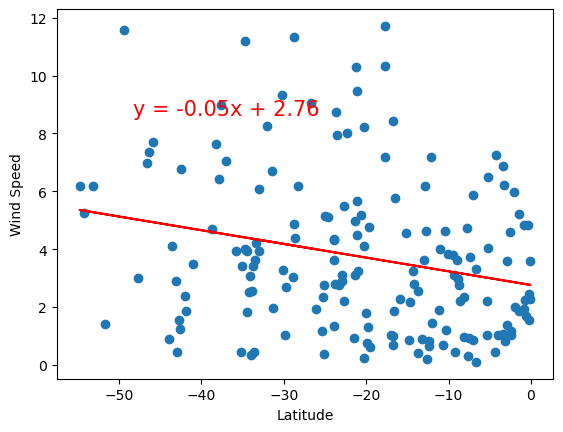

In [22]:
# Southern Hemisphere

line_eq = createLinregressPlot(southern_hemi_df['Lat'], 
                      southern_hemi_df['Wind Speed'], 
                      'Latitude', 'Wind Speed')

plt.annotate(line_eq, (55, 190), fontsize=15, color="red", xycoords = 'axes points')
plt.show()


**Discussion about the linear relationship:** 

In Northern Hemisphere, the wind speed mostly stay flat or increases slightly as the latitude goes up

In Southern Hemisphere, the wind speed reduces as the latitude goes up